In [11]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import math

In [8]:
cd ../OCR_dataset/

/home/elimen/Data/OCR_dataset


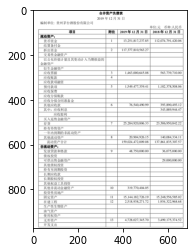

In [15]:
tableimg = cv2.imread("mt03.png")
plt.imshow(tableimg[:,:,::-1])
plt.show()

2714


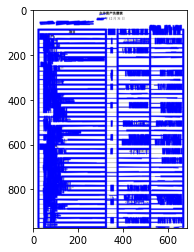

In [18]:
tableimg_grey = cv2.cvtColor(tableimg,cv2.COLOR_BGR2GRAY)

edgesimg = cv2.Canny(tableimg_grey, 50, 200)
cv2.imwrite("canny.jpg",edgesimg)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mophologyimg = cv2.dilate(edgesimg, kernel)
cv2.imwrite("dilate.jpg",mophologyimg)

linesP = cv2.HoughLinesP(mophologyimg, 1, np.pi / 180, threshold = 100, lines=10, minLineLength=20, maxLineGap=1)    #100,10,250
new = tableimg.copy()
print(len(linesP))
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
    
#lines = cv2.HoughLines(edgesimg, 0.2, np.pi / 180, 100)
#print(len(lines))
#thetas = []
#for line in lines:
#    for rho, theta in line:
#        a = np.cos(theta)
#        b = np.sin(theta)
#        x0 = a * rho
#        y0 = b * rho
#        x1 = int(x0 + 1000 * (-b))
#        y1 = int(y0 + 1000 * (a))
#        x2 = int(x0 - 1000 * (-b))
#        y2 = int(y0 - 1000 * (a))
#        if theta == 0:
#            thetas.append(theta)
#            new = cv2.line(new, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite("houghlines.jpg",new)
plt.imshow(new)
plt.show()